# Big-Data for Computational Finance - Assignment 1

## Introduction

### Project Goals

This project aims to implement and solve the Markowitz portfolio optimization model using Python. The project involves formulating the problem as a quadratic optimization task and examining various constraints to assess their impact on the efficient frontier.

### Tasks and Requirements

The project is divided into the following tasks:

- **Task 1: Solve the Original Problem**
  - Formulate and solve the Markowitz portfolio optimization problem with the standard constraints.
  - Plot the efficient frontier for different expected returns.

- **Task 2: Modify the Investment Constraint**
  - Change the total investment constraint to (\(\mathbf{e}^T \mathbf{x} \leq 1\)) and solve the optimization problem.
  - Compare the results with the original problem.

- **Task 3: Alter the Return Constraint**
  - Modify the return constraint to (\(\boldsymbol{\mu}^T \mathbf{x} \geq r\)) and solve the optimization problem.
  - Analyze how this modification affects the efficient frontier.

- **Task 4: Permit Short Selling**
  - Remove the non-negativity constraint (\(\mathbf{x} \geq \mathbf{0}\)) to allow short selling.
  - Solve the optimization problem and compare the results with previous tasks.

### Theoretical Background

The Markowitz model, also known as the mean-variance optimization model, is a foundational concept in modern portfolio theory. Developed by Harry Markowitz in 1952, this model seeks to create an optimal portfolio that maximizes return for a given level of risk or minimizes risk for a given level of return. The model relies on the following key concepts:

1. **Expected Return (\(\mu\))**: The expected return of a portfolio is the weighted sum of the expected returns of its individual assets. If a portfolio consists of \(n\) assets, the expected return \(\mu_p\) is given by:
   \[
   \mu_p = \sum_{i=1}^n x_i \mu_i
   \]
   where \(x_i\) is the proportion of the portfolio invested in asset \(i\) and \(\mu_i\) is the expected return of asset \(i\).

2. **Portfolio Variance (\(\sigma^2\))**: The risk or variance of a portfolio is determined by the variances of the individual assets and the covariances between them. The portfolio variance \(\sigma_p^2\) is given by:
   \[
   \sigma_p^2 = \sum_{i=1}^n \sum_{j=1}^n x_i x_j \sigma_{ij}
   \]
   where \(\sigma_{ij}\) is the covariance between the returns of assets \(i\) and \(j\).

3. **Covariance Matrix**: This is a symmetric matrix where the element at the \(i\)-th row and \(j\)-th column represents the covariance between the returns of assets \(i\) and \(j\). The covariance matrix is crucial for calculating portfolio variance.

4. **Efficient Frontier**: The efficient frontier is a set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios on the efficient frontier are considered optimal because no other portfolio provides a better return for the same risk level.

5. **Quadratic Optimization**: The Markowitz model is typically formulated as a quadratic optimization problem. The objective is to minimize the portfolio variance subject to constraints on expected return and the sum of portfolio weights. The optimization problem can be expressed as:
   \[
   \begin{aligned}
   & \text{Minimize} \quad & \frac{1}{2} \mathbf{x}^T \mathbf{\Sigma} \mathbf{x} \\
   & \text{subject to} \quad & \mathbf{\mu}^T \mathbf{x} = r \\
   & & \mathbf{e}^T \mathbf{x} = 1 \\
   & & \mathbf{x} \geq \mathbf{0}
   \end{aligned}
   \]
   where:
   - \(\mathbf{x}\) is the vector of asset weights,
   - \(\mathbf{\Sigma}\) is the covariance matrix,
   - \(\mathbf{\mu}\) is the vector of expected returns,
   - \(r\) is the target expected return,
   - \(\mathbf{e}\) is a vector of ones.

### Variations and Constraints

- **Total Investment Constraint**: The standard constraint in the Markowitz model is \(\mathbf{e}^T \mathbf{x} = 1\), meaning the sum of the portfolio weights equals 1. This implies full investment of the available capital.

- **Return Constraint**: The return constraint \(\boldsymbol{\mu}^T \mathbf{x} \geq r\) ensures that the portfolio achieves at least a specified expected return \(r\).

- **Non-Negativity Constraint**: The non-negativity constraint \(\mathbf{x} \geq \mathbf{0}\) ensures that short selling is not allowed, i.e., all portfolio weights must be non-negative.

- **Short Selling**: Removing the non-negativity constraint allows short selling, where investors can sell securities they do not currently own, with the intention of buying them back later at a lower price.

### Implications of Constraints

Each constraint in the Markowitz model affects the shape and position of the efficient frontier:

- Modifying the total investment constraint (\(\mathbf{e}^T \mathbf{x} \leq 1\)) can result in under-investment scenarios, where not all capital is allocated.
- Changing the return constraint impacts the achievable returns and associated risks, shifting the efficient frontier.
- Allowing short selling (\(\mathbf{x} \geq \mathbf{0}\)) typically expands the feasible set of portfolios, potentially leading to higher returns but also higher risks.



# IMPORTING LIBARARIES (NUMPY,RANDOM, MATPLOTLIB AND  SCIPY.OPTIMIZATION )

In [5]:
import numpy as np
import random 
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [6]:
# Registration numbere is (2320921)
reg_num = input("ENTER YOUR REGISTRATION NUMBER : ")

ENTER YOUR REGISTRATION NUMBER :  2320921


# " ---Task no 1 ---"

In [18]:
digit1 = int(reg_num[-2])
digit2 = int(reg_num[-1])


def dummy(digit1,digit2):
    dummy_rep = 10 * digit1 + digit2 
    for i in range(dummy_rep):
        dummy= random.uniform(0, 1)
    return dummy

# generating correlation matrix
def correlation_matrix(n):
    Cr = np.array([[0]*n for _ in range(n)], dtype=float)
    for i in range(n):
        for j in range(n):
            Cr[i][j] = (-1)**abs(i-j) / (abs(i-j) + 1)
    return Cr

# generating sigma and mmu
def gen_sigma_mu(n):
    sigma = np.zeros((n, 1), dtype=float)
    mu = np.zeros((n, 1), dtype=float)
    
    sigma[0] = 2 
    mu[0] = 3 

    for k in range(n-1):
        sigma[k+1] = sigma[k] + 2 * random.uniform(0, 1)
        mu[k+1] = mu[k] + 1
    
    mu = mu.flatten()
    return sigma, mu.flatten()# return sigma and mmu
# generating   covariance  matrix
def covariance_matrix(Cr, sigma):
    n = len(sigma)
    diag = np.zeros((n, n), dtype=float)
    np.fill_diagonal(diag, sigma.flatten())
    
    C2 = np.matmul(np.matmul(diag, Cr), diag)
    C = 0.5 * (C2 + C2.T)
    
    return C  #return covariance matrix


def main():
    n = 10
    Cr = correlation_matrix(n)
    sigma, mu = gen_sigma_mu(n)
    C = covariance_matrix(Cr, sigma)
    return mu,C
    print("Expected Returns=\n", mu)
    print("Covariance Matrix=\n", C)
    

# Expected Return and  Covariance Matrix

In [19]:
mu,C =main()
main()

(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 array([[  4.        ,  -2.64912747,   2.34217071,  -2.11000291,
           1.81034586,  -1.83031918,   1.97070668,  -1.81561637,
           1.67604453,  -1.86942696],
        [ -2.64912747,   7.01787634,  -4.65353157,   3.72644444,
          -2.99739808,   2.90924929,  -3.04538103,   2.74845669,
          -2.49753128,   2.75130573],
        [  2.34217071,  -4.65353157,  12.34296815,  -7.41298049,
           5.30017379,  -4.82278496,   4.84651802,  -4.25248348,
           3.78538304,  -4.10485975],
        [ -2.11000291,   3.72644444,  -7.41298049,  17.80844904,
          -9.54958754,   7.72395757,  -7.27684443,   6.12952931,
          -5.30468826,   5.63499475],
        [  1.81034586,  -2.99739808,   5.30017379,  -9.54958754,
          20.48345074, -12.42566528,  10.40567695,  -8.21723393,
           6.82699563,  -7.05064449],
        [ -1.83031918,   2.90924929,  -4.82278496,   7.72395757,
         -12.42566528,  30.15061468

In [25]:
def calculate_sigmas_mus(r_values, mu, C):
    # Define the number of assets
    n = len(mu)
    
    sigmas = []
    mus = []
    
    # Define the objective function (minimize variance)
    def objective(x, C):
        return x.T @ C @ x
    
    # Define the constraints
    def constraint_mu(x, target_mu, mu):
        return x @ mu - target_mu
    
    def constraint_sum(x):
        return np.sum(x) - 1
    
    # Bounds for the weights (non-negative)
    bounds = [(0, None) for _ in range(n)]
    
    # Solve the problem for each r
    for target_mu in r_values:
        # Initial guess for the weights
        x0 = np.ones(n) / n
        
        # Define the constraints 
        constraints = [
            {'type': 'eq', 'fun': constraint_mu, 'args': (target_mu, mu)},
            {'type': 'eq', 'fun': constraint_sum}
        ]
        
        # Solve the optimization problem
        result = minimize(objective, x0, args=(C,), bounds=bounds, constraints=constraints)
        
        # Check if the problem was solved successfully
        if result.success:
            # Get the optimal x
            x_opt = result.x
            
            # Calculate sigma(x) and mu(x)
            sigma = np.sqrt(x_opt.T @ C @ x_opt)
            mu_x = mu.T @ x_opt
        else:
            # If the problem was not solved successfully, set sigma_x and mu_x to np.nan
            sigma = np.nan
            mu_x = np.nan
        
        # Store the values
        sigmas.append(round(sigma, 2))
        mus.append(round(mu_x, 2))
    
    return sigmas, mus

r_values = np.arange(2.00, 9.25, 0.25)
# Call the calculate_sigmas_mus function
sigmas_1, mus_1 = calculate_sigmas_mus(r_values, mu, C)

# Plot the results

def show_graph():
        plt.show()
def plot_task_1(sigmas_1, mus_1):
     plt.figure(figsize=(10, 6))
     plt.plot(sigmas_1, mus_1, marker='o')
     plt.xlabel('σ (Standard Deviation of Portfolio)')
     plt.ylabel('μ (Expected Return of Portfolio)')
     plt.title('Efficient Frontier')
     plt.grid(True)
     plt.savefig('img_task1.png')
     plt.show()

# Task no # 1 plot

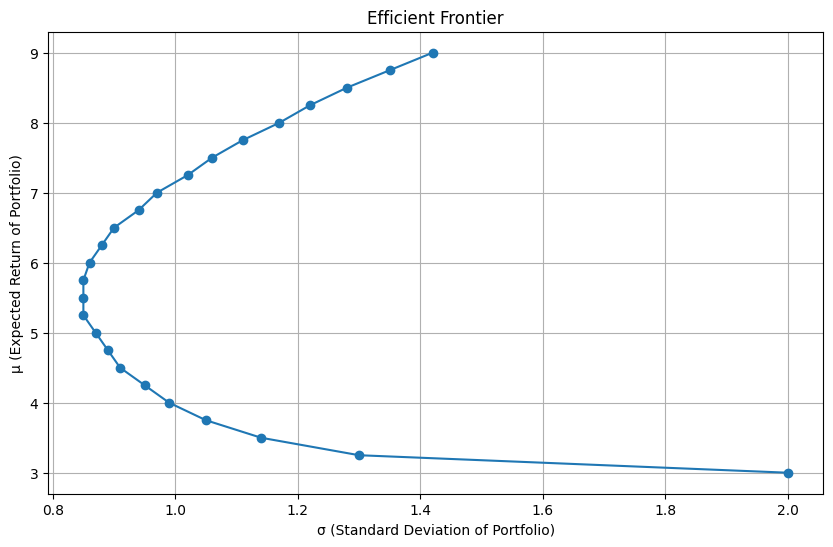

In [26]:
# calling function for task1 plot
plot_task_1(sigmas_1, mus_1)

# " ---Task no 2 ---"

In [30]:
e = np.ones(len(mu))
def calculate_sigmas_mus2(r_values, mu, C):
    # Define the number of assets
    n = len(mu)
    # Initialize lists to store sigma and mu values
    sigma_values = []
    mu_values = []
    
    # Define the objective function (minimize variance)
    def objective(x, C):
        return x.T @ C @ x
    # Bounds for the weights (non-negative)
    bounds = [(0, None) for _ in range(n)]
    
    # Solve the optimization problem for each r
    for r in r_values:
         # Define the objective function (variance)
        # Initial guess for the weights
        x0 = np.ones(n) / n

        # Define the constraints in the form required by `scipy.optimize.minimize`
        constraints = (
        {'type': 'eq', 'fun': lambda x: mu.T @ x - r},   # Expected return constraint
        {'type': 'ineq', 'fun': lambda x: 1 - e.T @ x},  # Sum of fractions constraint
        {'type': 'ineq', 'fun': lambda x: x}   )          # Non-negativity constraint
             
        # Solve the optimization problem
        result = minimize(objective, x0, args=(C,), bounds=bounds, constraints=constraints)
        
        # Check if the problem was solved successfully
        if result.success:
            # Get the optimal x
            x_opt = result.x
            
            # Calculate sigma(x) and mu(x)
            sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
            mu_x = mu.T @ x_opt
        else:
            # If the problem was not solved successfully, set sigma_x and mu_x to np.nan
            sigma_x = np.nan
            mu_x = np.nan
        
        # Store the values
        sigma_values.append(round(sigma_x, 2))
        mu_values.append(round(mu_x, 2))
    
    return sigma_values, mu_values

# Call the function
sigmas_2, mus_2 = calculate_sigmas_mus2(r_values, mu, C)

# Plot the result 
def plot_task_2(sigmas_2, mus_2):
     plt.figure(figsize=(10, 6))
     plt.plot(sigmas_2, mus_2, marker='o')
     plt.xlabel('σ (Standard Deviation of Portfolio)')
     plt.ylabel('μ (Expected Return of Portfolio)')
     plt.title('Efficient Frontier')
     plt.grid(True)
     plt.savefig('img_task2.png')
     plt.show()

# Task no # 2 plot

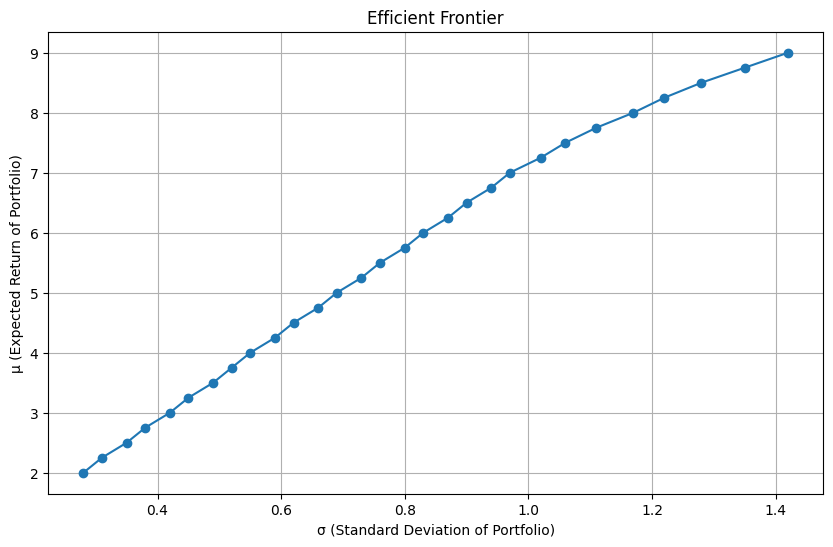

In [31]:
# calling function for task1 plot
plot_task_2(sigmas_2, mus_2)

# Task 2 plot -Compared- Task 1 plot

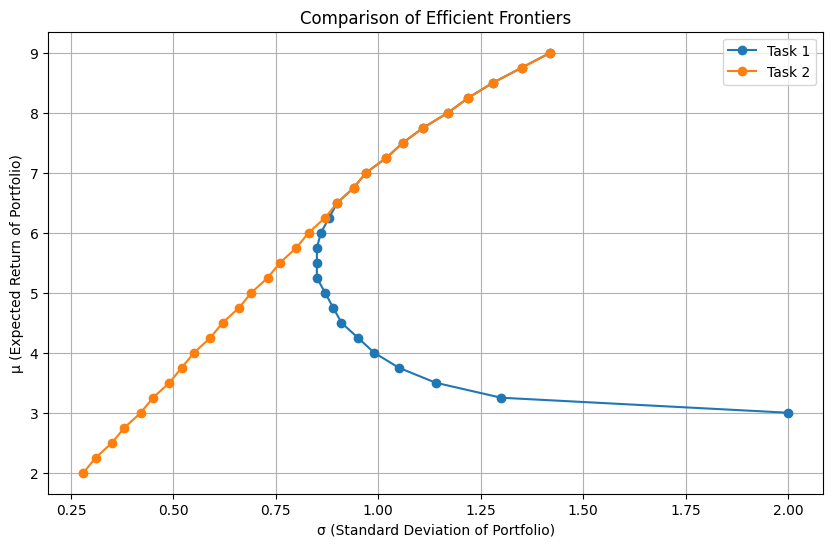

In [40]:
def compare_plots_1_2(sigmas_1, mus_1, sigmas_2, mus_2):
    plt.figure(figsize=(10, 6))
    plt.xlabel('σ (Standard Deviation of Portfolio)')
    plt.ylabel('μ (Expected Return of Portfolio)')
    plt.title('Comparison of Efficient Frontiers')
    plt.plot(sigmas_1, mus_1, marker='o', label='Task 1')
    plt.plot(sigmas_2, mus_2, marker='o', label='Task 2')
    plt.grid(True)
    plt.legend()
    plt.savefig('img_compare(1_2).png')
    plt.show()
compare_plots_1_2(sigmas_1, mus_1, sigmas_2, mus_2)

# *The blue line represents the first data set, while the orange line represents the second. The revised graphic still compares the efficient boundaries of the two data sets. Though the σ values vary somewhat, the comparison as a whole doesn't alter. Whereas the orange frontier is more linear and restricted, the blue frontier is still larger and more curved, suggesting a greater range of μ and σ. At the same spot where both frontiers converge, comparable risk-return combinations are displayed. The blue frontier indicates more aggressive investment alternatives compared to the orange frontier's more stable, conservative options, and it continues to provide larger returns for the same risk beyond this point.*

# " ---Task no 3 ---"

In [37]:
def calculate_sigmas_mus2(r_values, mu, C):
    # Define the number of assets
    n = len(mu)
    # Initialize lists to store sigma and mu values
    sigma_values = []
    mu_values = []
    
    # Define the objective function (minimize variance)
    def objective(x, C):
        return x.T @ C @ x
    # Bounds for the weights (non-negative)
    bounds = [(0, None) for _ in range(n)]
    
    # Solve the optimization problem for each r
    for r in r_values:
         # Define the objective function (variance)
        # Initial guess for the weights
        x0 = np.ones(n) / n

        # Define the constraints in the form required by `scipy.optimize.minimize`
        constraints = [
                {'type': 'ineq', 'fun': lambda x: mu @ x - r},  # Expected return constraint
                {'type': 'eq', 'fun': lambda x: e @ x - 1},     # Sum of fractions constraint
                {'type': 'ineq', 'fun': lambda x: x}    ]        # Non-negativity constraint

             
        # Solve the optimization problem
        result = minimize(objective, x0, args=(C,), bounds=bounds, constraints=constraints)
        
        # Check if the problem was solved successfully
        if result.success:
            # Get the optimal x
            x_opt = result.x
            
            # Calculate sigma(x) and mu(x)
            sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
            mu_x = mu.T @ x_opt
        else:
            # If the problem was not solved successfully, set sigma_x and mu_x to np.nan
            sigma_x = np.nan
            mu_x = np.nan
        
        # Store the values
        sigma_values.append(round(sigma_x, 2))
        mu_values.append(round(mu_x, 2))
    
    return sigma_values, mu_values

# Call the function
sigmas_3, mus_3 = calculate_sigmas_mus2(r_values, mu, C)

# Plot the result 
def plot_task_3(sigmas_3, mus_3):
     plt.figure(figsize=(10, 6))
     plt.plot(sigmas_3, mus_3, marker='o')
     plt.xlabel('σ (Standard Deviation of Portfolio)')
     plt.ylabel('μ (Expected Return of Portfolio)')
     plt.title('Efficient Frontier')
     plt.savefig('img_task3.png')
     plt.grid(True)
     plt.savefig('img_task3.png')
     plt.show()

# Task no # 3 plot

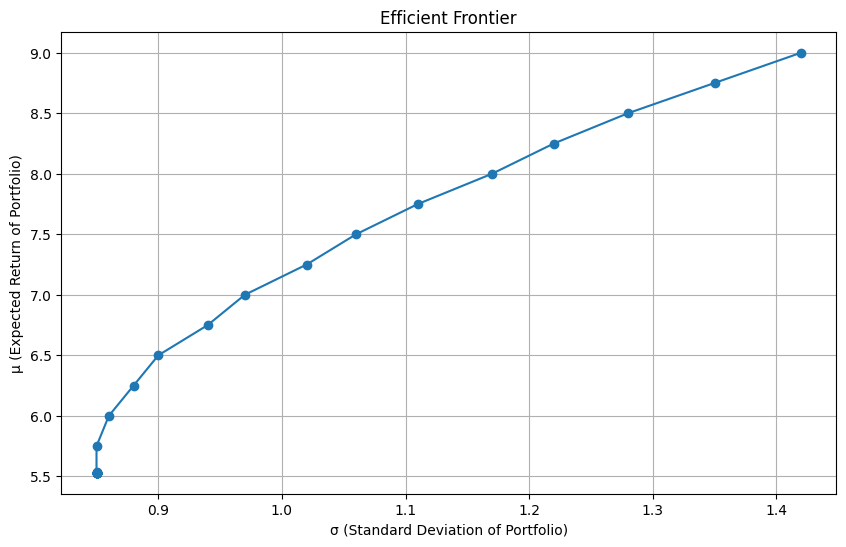

In [38]:
# calling function for task 3 plot
plot_task_3(sigmas_3, mus_3)

# Task 3 plot -Compared- Task 1 plot

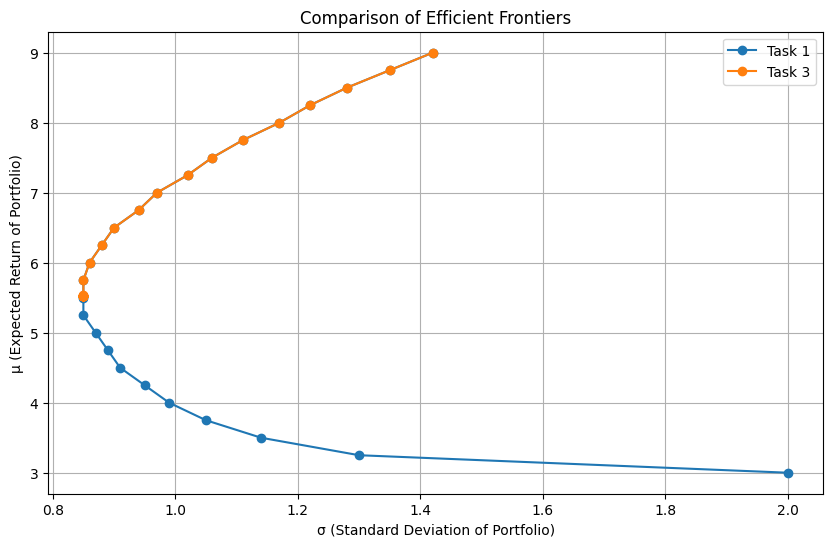

In [45]:
def compare_plots_1_3(sigmas_1, mus_1, sigmas_3, mus_3):
    plt.figure(figsize=(10, 6))
    plt.xlabel('σ (Standard Deviation of Portfolio)')
    plt.ylabel('μ (Expected Return of Portfolio)')
    plt.title('Comparison of Efficient Frontiers')
    plt.plot(sigmas_1, mus_1, marker='o', label='Task 1')
    plt.plot(sigmas_3, mus_3, marker='o', label='Task 3')
    plt.grid(True)
    plt.legend()
    plt.savefig('img_compare(1_3).png')
    plt.show()
compare_plots_1_3(sigmas_1, mus_1, sigmas_3, mus_3)

# *The efficient borders of the two data sets are plotted above, with the first data set shown in orange and the second in blue. The curve on the orange border is more dramatic, suggesting a larger range of standard deviations (σ) and anticipated returns (μ). The blue frontier, on the other hand, shows a more linear trend, indicating a more constrained and stable range of μ and σ. The orange frontier continues to show more aggressive, higher-return investments despite minor shifts in σ values, while the blue frontier continues to present more steady, cautious possibilities. The general comparison, which highlights the variations in investment approaches between the two data sets, is still applicable.*

# " ---Task no 4 ---"

In [28]:
def calculate_sigmas_mus4(r_values, mu, C):
    sigma_values = []
    mu_values = []
    n = len(mu)
    # Vector of ones
    e = np.ones(n)

    # Define the objective function (minimize variance)
    def objective(x, C):
        return x.T @ C @ x

    # Solve the optimization problem for each r
    for r in r_values:
        # Define the constraints
        constraints = [
            {'type': 'eq', 'fun': lambda x, mu=mu: mu.T @ x - r},  # Expected return constraint
            {'type': 'eq', 'fun': lambda x: e.T @ x - 1}           # Sum of fractions constraint
        ]
        
        # Initial guess for the weights (equal weights)
        x0 = np.ones(n) / n
        
        bounds = [(None, None) for _ in range(n)]
        
        # Minimize the objective function
        result = minimize(objective, x0, args=(C,), constraints=constraints, bounds=bounds)
        
        # Check if the problem was solved optimally
        if result.success:
            # Get the optimal x
            x_opt = result.x
            
            # Calculate sigma(x) and mu(x)
            sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
            mu_x = mu.T @ x_opt
        else:
            
            sigma_x = np.nan
            mu_x = np.nan
        
        # Store the values
        sigma_values.append(sigma_x)
        mu_values.append(mu_x)
    
    # Convert lists to numpy arrays for plotting
    sigma_values = np.array(sigma_values)
    mu_values = np.array(mu_values)
    
    return sigma_values, mu_values


# Call the function
sigmas_4, mus_4 = calculate_sigmas_mus4(r_values, mu, C)
# Plot the result 
def plot_task_4(sigmas_4, mus_4):
     plt.figure(figsize=(10, 6))
     plt.plot(sigmas_4, mus_4, marker='o')
     plt.xlabel('σ (Standard Deviation of Portfolio)')
     plt.ylabel('μ (Expected Return of Portfolio)')
     plt.title('Efficient Frontier')
     plt.grid(True)
     plt.savefig('img_task4.png')
     plt.show()

# Task no # 4 plot

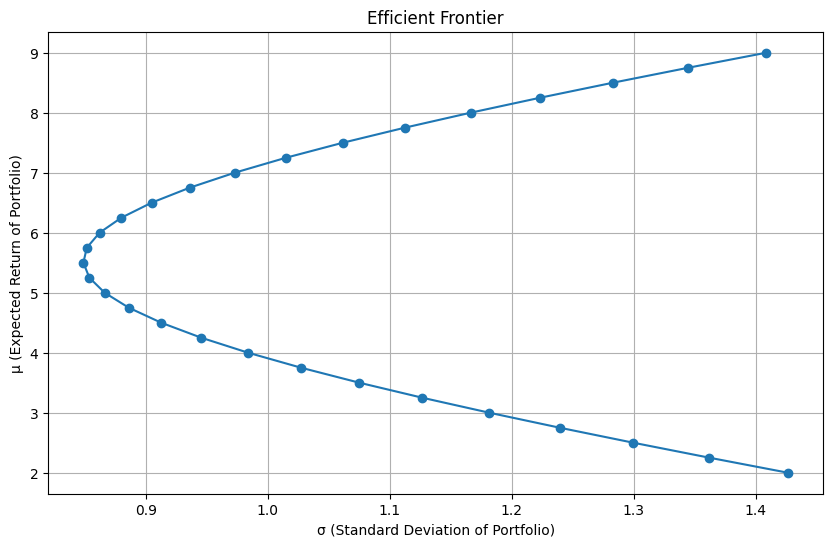

In [29]:
# calling function for task 4 plot
plot_task_4(sigmas_4, mus_4)

# Task 4 plot -Compared- Task 1 plot

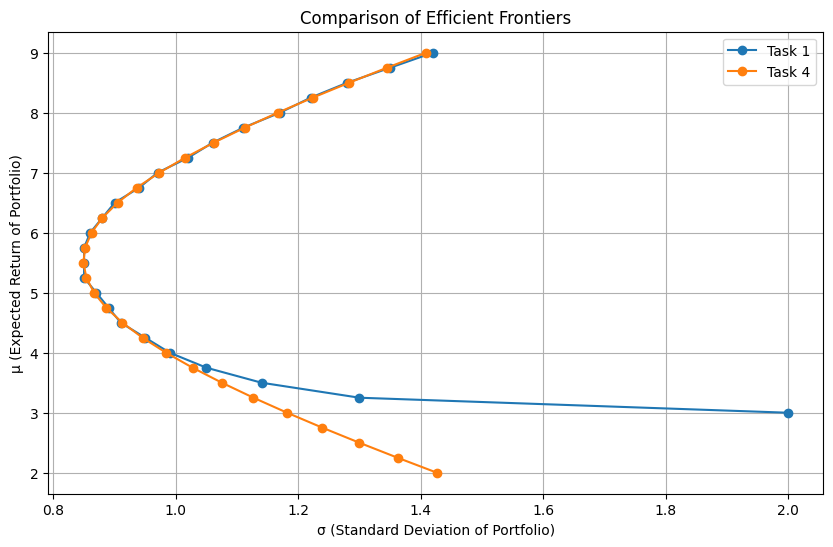

In [43]:
def compare_plots_1_4(sigmas_1, mus_1, sigmas_4, mus_4):
    plt.figure(figsize=(10, 6))
    plt.xlabel('σ (Standard Deviation of Portfolio)')
    plt.ylabel('μ (Expected Return of Portfolio)')
    plt.title('Comparison of Efficient Frontiers')
    plt.plot(sigmas_1, mus_1, marker='o', label='Task 1')
    plt.plot(sigmas_4, mus_4, marker='o', label='Task 4')
    plt.grid(True)
    plt.legend()
    plt.savefig('img_compare(1_4).png')
    plt.show()
compare_plots_1_4(sigmas_1, mus_1, sigmas_4, mus_4)

# *The efficient boundaries of two data sets are shown in the picture, with the first data set displayed in orange and the second in blue. The border in orange, which has a noticeable curvature. Though it follows a distinct pattern, the blue frontier likewise curves. Higher gains are available at the orange border as risk levels rise.even as the blue border shrinks. This shows that while the second data set (blue) drops beyond a certain risk, suggesting a more conservative strategy, the first data set (orange) delivers greater returns for a wider range of risk.*